In [19]:
# Import dependencies
import subprocess
import json
import os
from dotenv import load_dotenv
from bit import *
from web3 import Web3
from constants import *
from eth_account import Account
from web3.middleware import geth_poa_middleware

In [20]:
# Load and set environment variables
w3 = Web3(Web3.HTTPProvider("http://127.0.0.1:8545"))
load_dotenv()
mnemonic=os.getenv("MNEMONIC")

# Import constants.py and necessary functions from bit and web3

w3.middleware_onion.inject(geth_poa_middleware, layer=0)



In [22]:
# Establishing Coin contants

BTC = 'BTC'
ETH = 'ETH'
BTCTEST = 'BTC-test'
depth= 3
coin=BTC

In [23]:
# creating a function for wallet account creation

def derive_wallets(mnemonic,depth,coin):
    command = f'php derive -g --mnemonic="{mnemonic}" --cols=path,address,privkey,pubkey --numderive={depth} --coin={coin} --format=json' 
    p = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    p_status = p.wait()
    keys= json.loads(output)
    return keys

In [24]:
# Create a dictionary object called coins to store the output from `derive_wallets`.
coins = {
   ETH: derive_wallets(mnemonic,depth,ETH),
   BTC: derive_wallets(mnemonic,depth,BTC),
   BTCTEST: derive_wallets(mnemonic,depth,BTCTEST)
   }



In [27]:
btctest_privkey = coins[BTCTEST][0]['privkey']
eth_0_privkey = coins[ETH][0]['privkey']
eth_1_privkey= coins[ETH][1]['privkey']

In [28]:
# Create a function called `priv_key_to_account` that converts privkey strings to account objects.
def priv_key_to_account(coin, privkey):
 
    if coin==ETH:
        return Account.privateKeyToAccount(privkey)
    elif coin ==BTCTEST:
        return PrivateKeyTestnet(privkey)
  
    

In [29]:
eth_0_acct=priv_key_to_account(ETH,eth_0_privkey)
#eth_1_acct="0xd5e9ddeF40A999C25E3B84134e94b2960461BAaE"

In [30]:
eth_1_acct=priv_key_to_account(ETH,eth_1_privkey)

In [31]:
def create_raw_tx(coin,account, recipient, amount):
    gasEstimate = w3.eth.estimateGas(
        {"from": account.address, "to": recipient, "value": amount}
    )
    return {
        "from": account.address,
        "to": recipient,
        "value": amount,
        "gasPrice": w3.eth.gasPrice,
        "gas": gasEstimate,
        "nonce": w3.eth.getTransactionCount(account.address),
        "chainId": 1337
    }


In [32]:
# Create a function called `send_tx` that calls `create_tx`, signs and sends the transaction.
def send_tx(coin, account, recipient, amount):
    tx = create_raw_tx(coin, account, recipient, amount)
    signed_tx = account.sign_transaction(tx)
    return w3.eth.sendRawTransaction(signed_tx.rawTransaction)



In [33]:

print(f"my public key {eth_0_acct.address}")
print(f"my friend's public key {eth_1_acct.address}")

my public key 0xd5e9ddeF40A999C25E3B84134e94b2960461BAaE
my friend's public key 0x15B1e141CFDA2dC3A7b423ddB7B94958B40aB440


In [34]:


# Send ETH transaction
send_tx(ETH,eth_0_acct, eth_1_acct.address, 2)

HexBytes('0x40c6067abcd827b8db57997769a02477e2ce65f458fcf2412bfa7103423529db')

In [35]:
send_tx(ETH,eth_0_acct, eth_1_acct.address, 15)

HexBytes('0xb06f6d64028ad53dcd2e4d6d2d246b5739d292c0608962eeee7b9b4a58016f74')

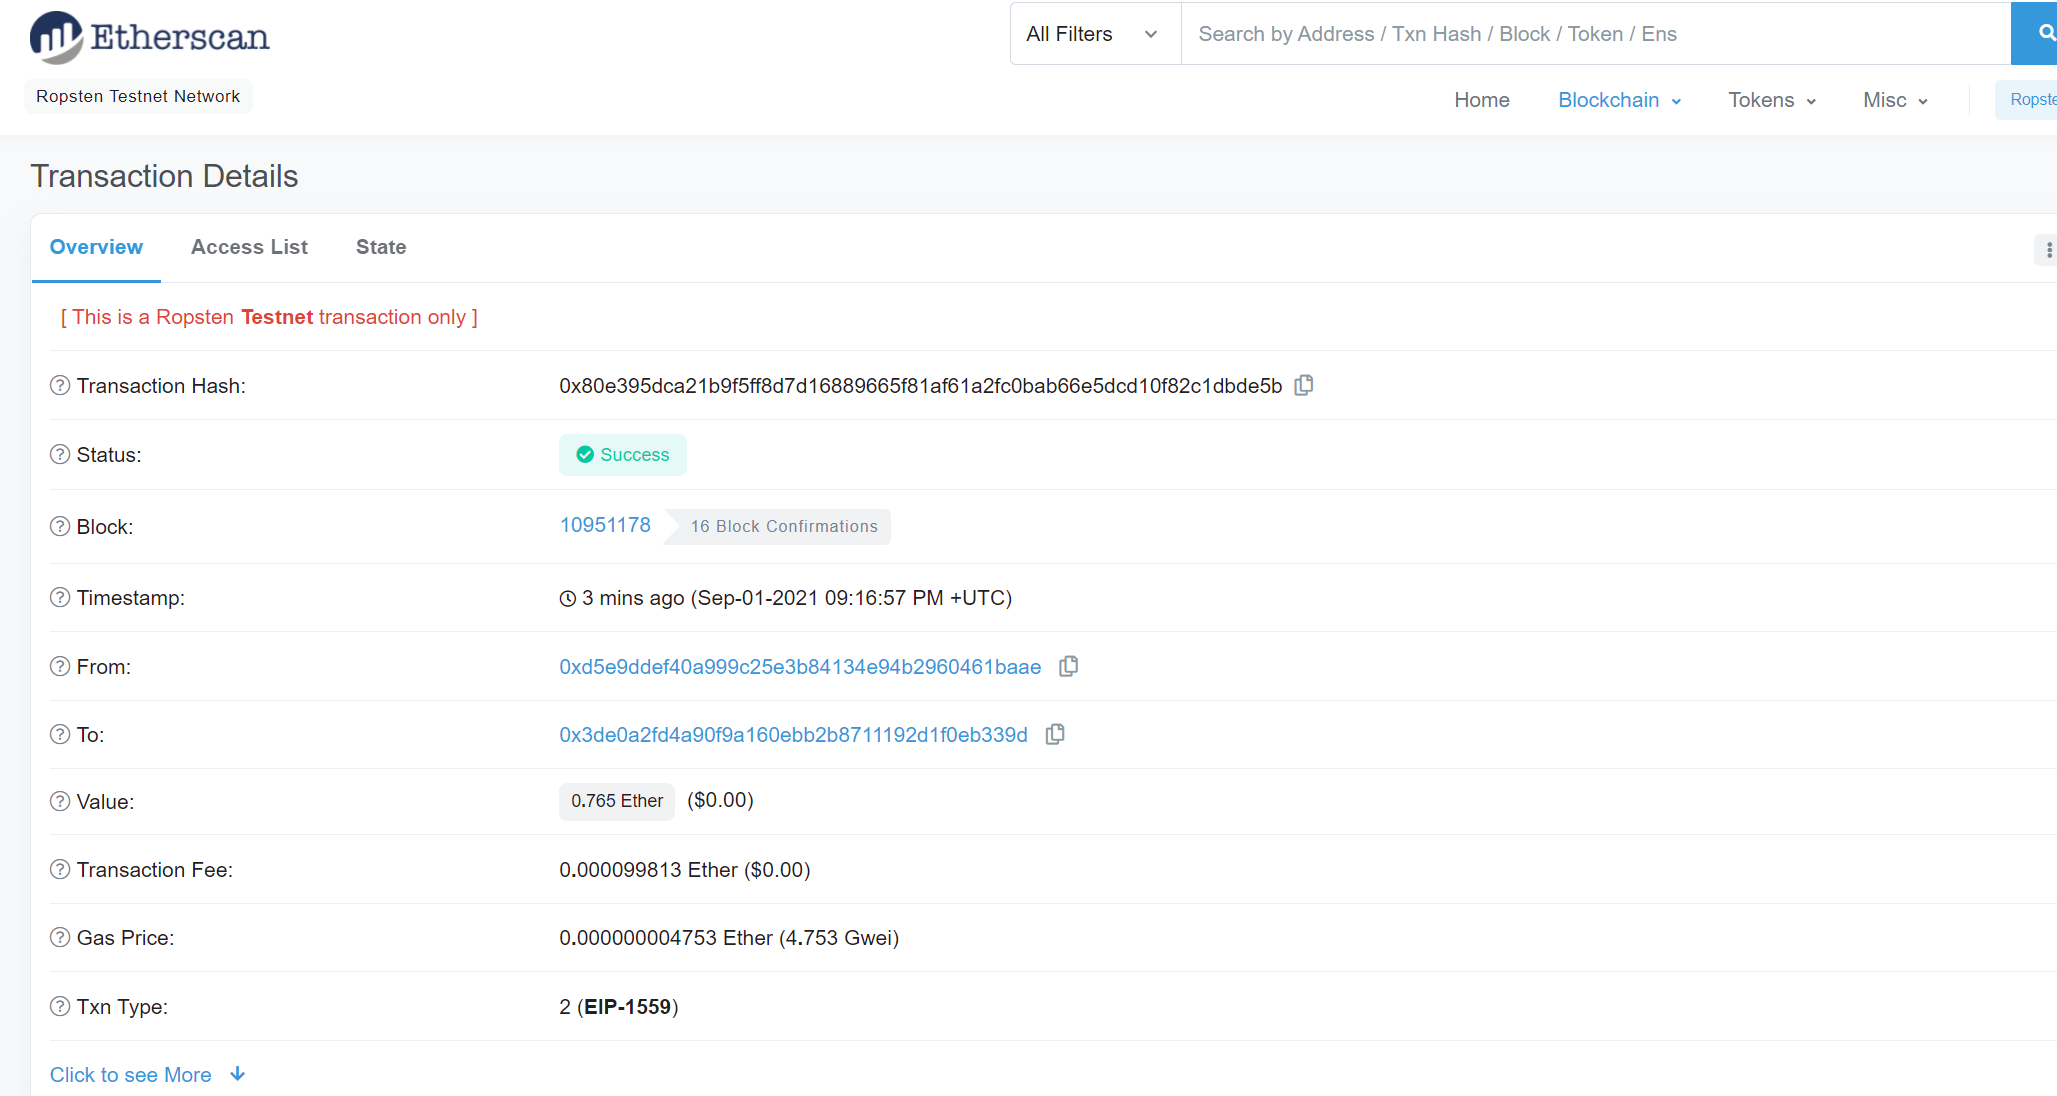

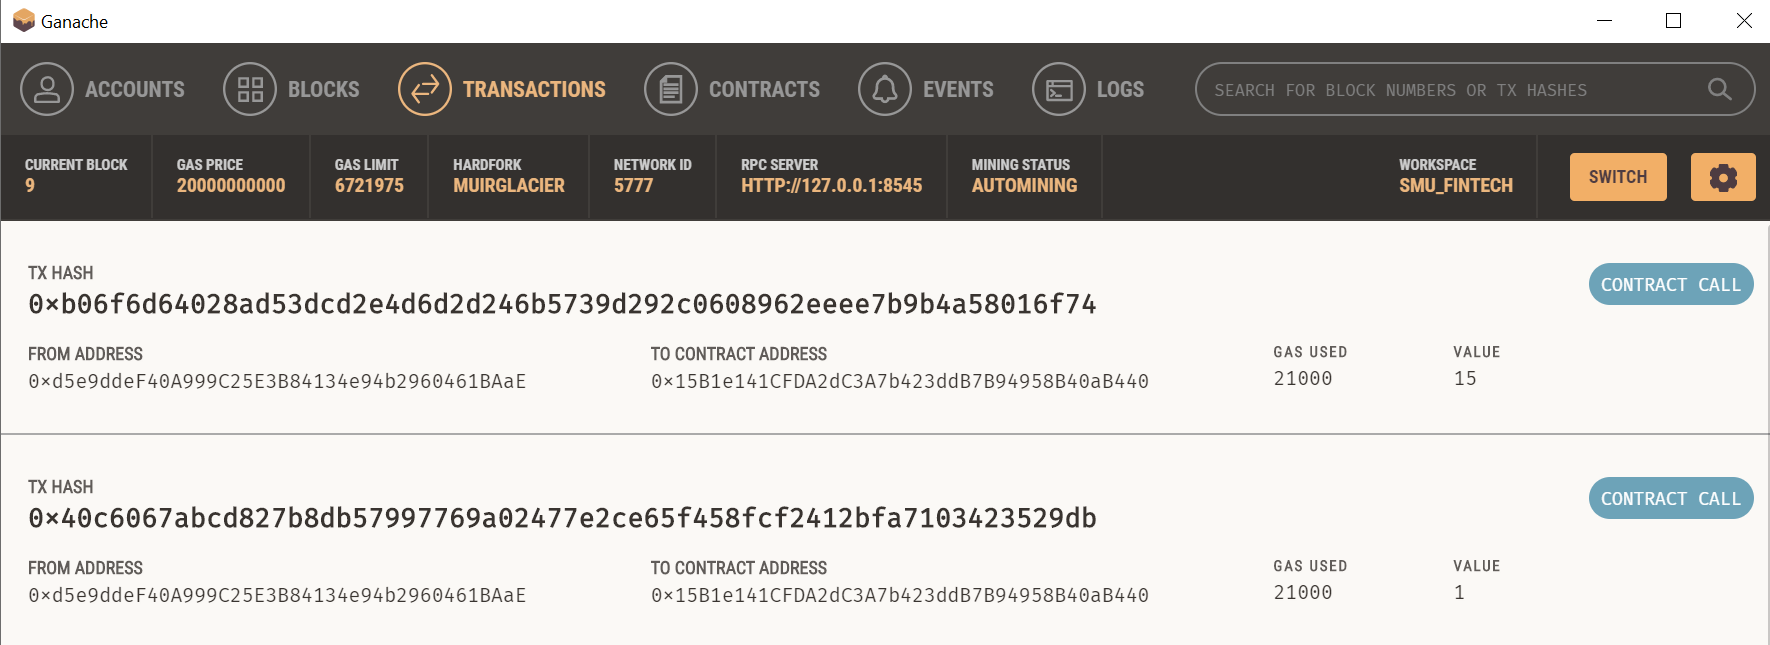